In [40]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import math

df=pd.read_csv("DS1_C8_Computers_Data_Project.csv")
df

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
0,1,1499,25,80,4,14,no,no,yes,94,94,1
1,2,1795,33,85,2,14,no,no,yes,94,94,1
2,3,1595,25,170,4,15,no,no,yes,94,94,1
3,4,1849,25,170,8,14,no,no,no,94,94,1
4,5,3295,33,340,16,14,no,no,yes,94,104,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,70,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,70,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,70,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,70,35


In [2]:
df.shape

(6259, 12)

In [3]:
df.columns

Index(['index', 'price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi',
       'premium', 'ads_2022', 'ads_2023', 'trend'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     6259 non-null   int64 
 1   price     6259 non-null   int64 
 2   speed     6259 non-null   int64 
 3   hd        6259 non-null   int64 
 4   ram       6259 non-null   int64 
 5   screen    6259 non-null   int64 
 6   cd        6259 non-null   object
 7   multi     6259 non-null   object
 8   premium   6259 non-null   object
 9   ads_2022  6259 non-null   int64 
 10  ads_2023  6259 non-null   int64 
 11  trend     6259 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 586.9+ KB


In [5]:
df.isnull().sum()

index       0
price       0
speed       0
hd          0
ram         0
screen      0
cd          0
multi       0
premium     0
ads_2022    0
ads_2023    0
trend       0
dtype: int64

In [6]:
NC= df.select_dtypes(exclude="object")
NC

,index,price,speed,hd,ram,screen,ads_2022,ads_2023,trend
0,1,1499,25,80,4,14,94,94,1
1,2,1795,33,85,2,14,94,94,1
2,3,1595,25,170,4,15,94,94,1
3,4,1849,25,170,8,14,94,94,1
4,5,3295,33,340,16,14,94,104,1
...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,39,70,35
6255,6256,2223,66,850,16,15,39,70,35
6256,6257,2654,100,1200,24,15,39,70,35
6257,6258,2195,100,850,16,15,39,70,35


In [7]:
CC= df.select_dtypes(include="object")
CC

,cd,multi,premium
0,no,no,yes
1,no,no,yes
2,no,no,yes
3,no,no,no
4,no,no,yes
...,...,...,...
6254,no,no,yes
6255,yes,yes,yes
6256,yes,no,yes
6257,yes,no,yes


In [8]:
n_list=list(NC.columns)
n_list

['index',
 'price',
 'speed',
 'hd',
 'ram',
 'screen',
 'ads_2022',
 'ads_2023',
 'trend']

In [9]:
c_list=list(CC.columns)
c_list

['cd', 'multi', 'premium']

In [10]:
from tabulate import tabulate
table=[n_list,c_list]
print(tabulate({"categorical":c_list,"numerical":n_list},headers=["categorical","numerical"]))

categorical    numerical
-------------  -----------
cd             index
multi          price
premium        speed
               hd
               ram
               screen
               ads_2022
               ads_2023
               trend


# Task-1:

# Business Objective - 4: Analyzing advertising budget for premium computers by identifying budget allocation

In [ ]:
# Step 1: Establish the null and alternative hypothesis:
H0: The mean advertising budget in 2023 is equal to or less than that of 2022 (mu=221.3)
H1:The mean advertising budget in 2023 is greater than that of 2022 (mu=221.3)

In [ ]:
# Step2: Symbolise
H0:p<=221.3
H1:P>221.3
#So here we have to perform right-tailed test

In [ ]:
#Step:3
#Information about the data set
sample size n =49
population mean: 221.3
population standard deviation = 74.83
alpha = 5%= 0.05

In [ ]:
#Step 4: Establish the decision rule
i) if p_value<alpha: rejection of null hypothesis(H0)
ii) if -t-critical > t-statistic> +t-critical: Rejection of null hypothesis(H0)

In [ ]:
#Step 5: Gather the sample data
premium_data = df[df['premium'] == 'yes']
premium_data

In [ ]:
# Extracting the 2023 advertising budget for premium computers
ads_2023_premium = premium_data['ads_2023']
ads_2023_premium

In [ ]:
sample_df=ads_2023_premium.sample(n=40, random_state=1)
sample_df

In [ ]:
import statistics as st
import math
from scipy.stats import norm
import numpy as np

In [ ]:
import random

sample_size = 40
sample_ads_2023 = ads_2023_premium.sample(n=sample_size, random_state=1)

# Given values
mu_2022 = 221.3  # Mean advertising budget in 2022
sigma = 74.83    # Population standard deviation
#n = len(sample_ads_2023)  # Sample size
alpha = 0.05     # Level of significance

# Sample mean for the selected 40 samples
sample_mean = st.mean(sample_ads_2023)

# The z-statistic
z_statistic = (sample_mean - mu_2022) / (sigma / np.sqrt(n))

# p-value for a one-sided right-tailed test
p_value = norm.sf(abs(z_statistic))

# The critical z-value for a one-sided right-tailed test
z_critical = norm.ppf(1 - alpha)

# Display results
print("Sample Mean (2023):", sample_mean)
print("Z-statistic:", z_statistic)
print("P-value:", p_value)
print("Z-critical value:", z_critical)
if p_value < alpha:
    print("Conclusion: Reject H0: There is enough evidence to support the claim.")
else:
    print("Conclusion: Failed to reject H0: There is not enough evidence to support the claim.")


In [ ]:
#Distribution plot

import matplotlib.pyplot as plt

z_statistic = -0.8663195514292634
z_critical = 1.6448536269514722
alpha = 0.05

z = np.linspace(-3, 3, 500)
pdf = norm.pdf(z)

plt.figure(figsize=(10, 6))
plt.plot(z, pdf, color='blue', label="Standard Normal Distribution")
plt.fill_between(z, 0, pdf, where=(z > z_critical), color='red', alpha=0.5, label="Rejection Region (α = 0.05)")
plt.axvline(z_statistic, color='green', linestyle='--', linewidth=2, label=f"Z-statistic = {z_statistic:.2f}")
plt.text(z_statistic + 0.1, 0.1, "Z-statistic", fontsize=10, color='green')
plt.title("Z-Test Distribution Plot", fontsize=14)
plt.xlabel("Z-Value", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.legend()
plt.grid(alpha=0.4)
plt.show()

In [ ]:
Business_Conclusion="""Based on the analysis, I tested Maya's hypothesis that the mean advertising budget for promoting premium computers in 2023 is higher than that in 2022. However, the statistical evidence does not support this claim:

Test Results:

The z-statistic (-0.8663) is less than the critical z-value (1.6449).
The p-value (0.1932) is greater than the significance level (0.05).
Conclusion: At the 5% level of significance, we fail to reject the null hypothesis. This means there isn't sufficient evidence to conclude that the advertising budget in 2023 is significantly higher than in 2022.

Business Implications:

The observed increase in the advertising budget for 2023 compared to 2022 might not reflect a meaningful or impactful change. It could be a result of random variation rather than a deliberate or effective increase in promotional efforts.
The company should reassess its advertising strategy for premium computers. Additional investments should be aligned with measurable outcomes, such as increased sales or market share, to ensure the effectiveness of the budget allocation."""

print(Business_Conclusion)

# Task-2:

# Business Objective - 5: Evaluate the price difference between computers with and without CD players

In [ ]:
H0:There is no significant difference in the average price of computers with and without CD players
H1:There is a significant difference in the average price of computers with and without CD players

In [ ]:
H0: mu1-mu2 = 0 average price of computers with cd player = average price of computers without cd player
H1: mu1-mu2!= 0 average price of computers with cd player != average price of computers without cd player

In [ ]:
Establish the decision rule
i) if p_value<alpha: rejection of null hypothesis(H0)
ii) if -t-critical > t-statistic> +t-critical: Rejection of null hypothesis(H0)

In [26]:
# Separating the data into two groups: with CD and without CD players
with_cd = df[df['cd'] == 'yes'][['price']]
without_cd = df[df['cd'] == 'no'][['price']]

In [28]:
with_cd

,price
6,1720
30,1920
63,2220
70,4020
77,3220
...,...
6253,2154
6255,2223
6256,2654
6257,2195


In [30]:
without_cd

,price
0,1499
1,1795
2,1595
3,1849
4,3295
...,...
6240,1595
6246,1554
6247,1654
6252,1690


In [32]:
#sample 1: With CD_PLAYER
#Information about the data set

import statistics as st
n1=len(with_cd)
with_cd_mean= st.mean(with_cd["price"])
print("with_cd_mean:", with_cd_mean)
with_cd_std = st.stdev(with_cd["price"])
print("with_cd_std:", with_cd_std)
with_cd_var=with_cd_std**2
print("with_cd_var:", with_cd_var)
alpha= 0.05

with_cd_mean: 2342.6055708390645
with_cd_std: 527.4477919505294
with_cd_var: 278201.173233489


In [42]:
#sample 2: Without CD_PLAYER
#Information about the data set

import statistics as st
n2=len(without_cd)
without_cd_mean= st.mean(without_cd["price"])
print("without_cd_mean:", without_cd_mean)
without_cd_std = st.stdev(without_cd["price"])
print("without_cd_std:", without_cd_std)
without_cd_var=without_cd_std**2
print("without_cd_var:", without_cd_var)
alpha= 0.05

without_cd_mean: 2112.8119964189796
without_cd_std: 603.494237086272
without_cd_var: 364205.29419634154


In [44]:
z_statistic_1 = ((with_cd_mean -without_cd_mean)-0)/math.sqrt((with_cd_var/n1 + without_cd_var/n2))

p_value_1 = norm.sf(abs(z_statistic_1)) * 2 #two tailed test

z_critical_1 = norm.ppf(1-alpha/2) # two tailed test

print("z_statistic_1:",z_statistic_1)
print("p_value_1:",p_value_1)
print("z_critical_1:",z_critical_1)

z_statistic_1: 16.07486310306849
p_value_1: 3.8283817362952e-58
z_critical_1: 1.959963984540054


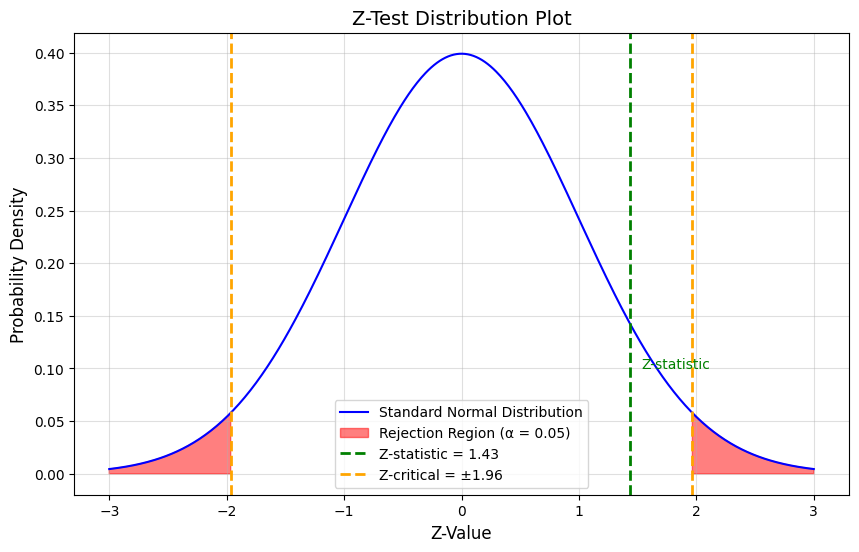

In [46]:
#Distribution plot

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

z_statistic = 1.4335172808223826
z_critical = 1.959963984540054
alpha = 0.05

z = np.linspace(-3, 3, 500)
pdf = norm.pdf(z)

plt.figure(figsize=(10, 6))
plt.plot(z, pdf, color='blue', label="Standard Normal Distribution")
plt.fill_between(z, 0, pdf, where=(np.abs(z) > z_critical), color='red', alpha=0.5, label="Rejection Region (α = 0.05)")
plt.axvline(z_statistic, color='green', linestyle='--', linewidth=2, label=f"Z-statistic = {z_statistic:.2f}")
plt.axvline(-z_critical, color='orange', linestyle='--', linewidth=2, label=f"Z-critical = ±{z_critical:.2f}")
plt.axvline(z_critical, color='orange', linestyle='--', linewidth=2)
plt.text(z_statistic + 0.1, 0.1, "Z-statistic", fontsize=10, color='green')
plt.title("Z-Test Distribution Plot", fontsize=14)
plt.xlabel("Z-Value", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.legend()
plt.grid(alpha=0.4)
plt.show()


In [50]:
if p_value_1 < alpha:
    print("Reject H0: There is a statistically significant difference in the average price of computers with and without CD players.")
else:
    print("Fail to reject H0: There is no statistically significant difference in the average price of computers with and without CD players.")

Reject H0: There is a statistically significant difference in the average price of computers with and without CD players.


# Task-3:

# Business Objective - 6: Analyze premium computer pricing strategy

# i) Identify price discrepancy for premium computers

In [ ]:
Null and Alternative Hypotheses:
H0: The mean price of premium computers = 2200
Ha: The mean price of premium computers!= 2200

In [ ]:
H0:p=2200
H1:P!=2200

In [ ]:
Establish the decision rule
i) if p_value<alpha: rejection of null hypothesis(H0)
ii) if -t-critical > t-statistic> +t-critical: Rejection of null hypothesis(H0)

In [ ]:
import math
import statistics as st
from scipy.stats import t
import pandas as pd


# Parameters
mu = 2200  # Hypothesized mean
alpha = 0.05  # Significance level

# Selecting 25 samples from the dataframe
sample_size = 25
dof = sample_size - 1  # Degrees of freedom

# Filter for premium data
premium_data = df[df['premium'] == 'yes']

# Randomly select 25 samples from the premium computers
sample_data = premium_data['price'].sample(n=sample_size, random_state=1)

# Sample statistics
sample_mean = st.mean(sample_data)
sample_std = st.stdev(sample_data)

# The t-statistic
t_statistic = (sample_mean - mu) / (sample_std / math.sqrt(sample_size))

# The p-value for two-tailed test
p_value = t.sf(abs(t_statistic), df=dof) * 2  # Two-tailed test

# The t-critical value for two-tailed test
t_critical = t.ppf(1 - alpha / 2, df=dof)  # Two-tailed test

# Display results
print("Sample Mean:", sample_mean)
print("Sample Standard Deviation:", sample_std)
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print("T-critical Value:", t_critical)

# Decision
if abs(t_statistic) > t_critical:
    print("Reject the null hypothesis (H0): The mean price significantly differs from $2200.")
else:
    print("Failed to reject the null hypothesis (H0): No significant difference in the mean price from $2200.")


In [ ]:
#Distribution curve

t_statistic = 0.09806368250690449
t_critical = 2.0638985616280205
dof = 24

t_values = np.linspace(-4, 4, 500)
pdf = t.pdf(t_values, dof)

plt.figure(figsize=(10, 6))
plt.plot(t_values, pdf, color='blue', label="T-Distribution (dof = 29)")
plt.fill_between(t_values, 0, pdf, where=(np.abs(t_values) > t_critical), color='red', alpha=0.5, label="Rejection Region (alpha = 0.05)")
plt.axvline(t_statistic, color='green', linestyle='--', linewidth=2, label=f"T-statistic = {t_statistic:.2f}")
plt.axvline(-t_critical, color='orange', linestyle='--', linewidth=2, label=f"T-critical = ±{t_critical:.2f}")
plt.axvline(t_critical, color='orange', linestyle='--', linewidth=2)
plt.text(t_statistic + 0.1, 0.05, "T-statistic", fontsize=10, color='green')
plt.title("T-Test Distribution Plot", fontsize=14)
plt.xlabel("T-Value", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.legend()
plt.grid(alpha=0.4)
plt.show()


# ii) Analyze price disparity between premium and non-premium computers

In [ ]:
Null and Alternative Hypotheses:
H0: There is no significant disparity between the means of premium and non-premium computers
Ha: There is significant disparity between the means of premium and non-premium computers

In [ ]:
H0:mu1-mu2=0
H1:mu1-m2!=0

In [ ]:
Establish the decision rule
i) if p_value<alpha: rejection of null hypothesis(H0)
ii) if -t-critical > t-statistic> +t-critical: Rejection of null hypothesis(H0)

In [ ]:
from scipy.stats import t

# Parameters
alpha = 0.05  
sample_size = 25  
dof = 2 * sample_size - 2  # Degrees of freedom

premium_data = df[df['premium'] == 'yes']
non_premium_data = df[df['premium'] == 'no']

# Randomly sampling 25 data points from each group
premium_sample = premium_data['price'].sample(n=sample_size, random_state=1)
non_premium_sample = non_premium_data['price'].sample(n=sample_size, random_state=1)

# Calculating sample means and variances
x1 = st.mean(premium_sample) # Mean of premium group
x2 = st.mean(non_premium_sample)  # Mean of non-premium group
v1 = (st.stdev(premium_sample))**2  # Variance of premium group
v2 = (st.stdev(non_premium_sample))**2  # Variance of non-premium group
n1 = n2 = sample_size  # Sample sizes

# Noise and signal calculations

pooled_std = math.sqrt(((v1 * (n1 - 1) + v2 * (n2 - 1))/dof) * (1 / n1 + 1 / n2))
signal = abs(x1 - x2)
t_statistic = signal / pooled_std

# P-value for two-tailed test
p_value = t.sf(abs(t_statistic), dof) * 2

# T-critical value for two-tailed test
t_critical = t.ppf(1 - alpha / 2, dof)

print("Premium Mean (x1):", x1)
print("Non-Premium Mean (x2):", x2)
print("Premium Variance (v1):", v1)
print("Non-Premium Variance (v2):", v2)
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print("T-critical Value:", t_critical)

# Decision
if abs(t_statistic) > t_critical:
    print("Reject the null hypothesis (H0): There is a significant difference in the mean prices of premium and non-premium computers.")
else:
    print("Failed to reject the null hypothesis (H0): No significant difference in the mean prices of premium and non-premium computers.")


In [ ]:
# Distribution plot

t_statistic = 0.39686793308313423
t_critical = 2.010634757624232
dof = 24

t_values = np.linspace(-4, 4, 500)
pdf = t.pdf(t_values, dof)

plt.figure(figsize=(10, 6))
plt.plot(t_values, pdf, color='blue', label="T-Distribution (dof = 24)")
plt.fill_between(t_values, 0, pdf, where=(np.abs(t_values) > t_critical), color='red', alpha=0.5, label="Rejection Region (alpha = 0.05)")
plt.axvline(t_statistic, color='green', linestyle='--', linewidth=2, label=f"T-statistic = {t_statistic:.2f}")
plt.axvline(-t_critical, color='orange', linestyle='--', linewidth=2, label=f"T-critical = ±{t_critical:.2f}")
plt.axvline(t_critical, color='orange', linestyle='--', linewidth=2)
plt.text(t_statistic + 0.1, 0.05, "T-statistic", fontsize=10, color='green')
plt.title("T-Test Distribution Plot", fontsize=14)
plt.xlabel("T-Value", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.legend()
plt.grid(alpha=0.4)
plt.show()


# FINAL BUSINESS CONCLUSION: